In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We should not use "dropna"  now as it removes 6982 + rows 
# Instead it is Better to remove Columns "last_review" and "reviews_per_month "

In [2]:
df1 = pd.read_csv('Data/Train.csv',encoding="ISO-8859-1")

#country = pd.read_excel('Country-Code.xlsx')
#country.head()
df1.shape
df1.isnull().sum()


id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [4]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Null values in Column "name" = 12
# Null values in Column "host_name" =13

In [5]:
df1['name'].isnull().sum()


12

In [6]:
df1['host_name'].isnull().sum()

13

# Price distribution (Actual data set)

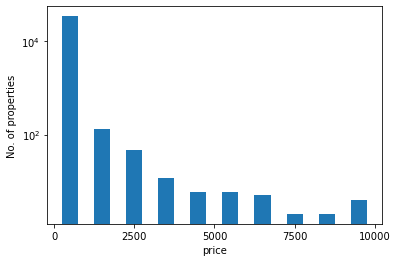

In [7]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

# Price distribution (price<4000)

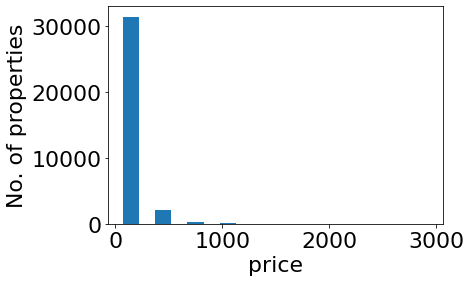

In [8]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()


# Price distribution (price<500)
# Majority of the properties (about 1/3 rd) are priced around 100 dollars
# only 892 properties cost more than 500 dollars

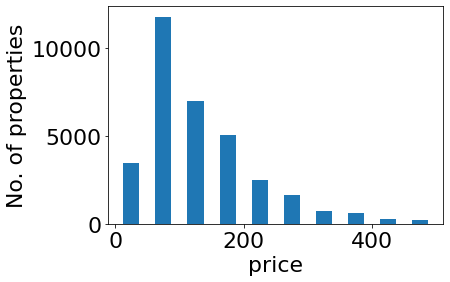

In [9]:
df2 = df1[df1.price < 500]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [10]:
df1.shape

(34226, 16)

In [11]:
df2.shape

(33334, 16)

In [12]:
df2 = df1[df1.price>=500]
df2.shape

(892, 16)

# Distribution of room types (not working, kernal hangs!!!)

In [13]:
#plt.hist(df1.room_type,rwidth=0.5)
#plt.xlabel('Room_Type')
#plt.ylabel('No. of properties')
#plt.rcParams.update({'font.size': 22})
#plt.show()

# Finding total no of host_names

In [14]:
df1['host_name'].value_counts()

Michael         291
David           290
Sonder (NYC)    229
John            208
Alex            199
               ... 
Slava             1
Edwina            1
DesirÃ©e          1
Lamia             1
Lilli             1
Name: host_name, Length: 9290, dtype: int64

# Total neighbourhood_groups

In [15]:
df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

#  Popular neighbourhoods

In [16]:
df1.groupby('neighbourhood_group')['neighbourhood'].value_counts()
df1.pivot_table(index=['neighbourhood_group', 'neighbourhood'], values = 'id',aggfunc='count').sort_values('id',ascending=False)

id
neighbourhood_group neighbourhood                   
Brooklyn            Williamsburg                2756
                    Bedford-Stuyvesant          2577
Manhattan           Harlem                      1877
Brooklyn            Bushwick                    1719
Manhattan           Upper West Side             1403
...                                              ...
Staten Island       Rossville                      1
                    Bay Terrace, Staten Island     1
                    Lighthouse Hill                1
                    Huguenot                       1
Bronx               Spuyten Duyvil                 1

[217 rows x 1 columns]

# Finding average price of top host "Michael" by 'room_type'

In [17]:
df2 = df1[ df1['host_name']=='Michael']
df2.groupby('room_type')['price'].mean()

room_type
Entire home/apt    195.715909
Private room        81.266667
Shared room         72.100000
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' 'neighbourhood_group'

In [18]:
df2.groupby('neighbourhood_group')['price'].mean()


neighbourhood_group
Bronx            111.666667
Brooklyn         114.818966
Manhattan        184.201389
Queens           131.560000
Staten Island     77.333333
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' neighbourhood'

In [19]:
df2.groupby('neighbourhood')['price'].mean()

neighbourhood
Arverne                      300.000000
Astoria                       98.000000
Bay Ridge                    135.000000
Bedford-Stuyvesant            75.750000
Boerum Hill                  145.000000
Brighton Beach                83.333333
Brooklyn Heights             170.000000
Bushwick                      92.105263
Carroll Gardens              125.000000
Chelsea                      206.440000
Chinatown                    195.000000
Claremont Village            150.000000
Clinton Hill                 121.250000
Concord                      120.000000
Concourse Village             85.000000
Crown Heights                119.000000
East Harlem                   77.000000
East New York                 33.000000
East Village                 165.916667
Financial District           145.000000
Flatbush                     100.000000
Flatiron District            400.000000
Gowanus                      125.000000
Gramercy                     202.000000
Greenpoint                

# Costly hosts

In [20]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
29644,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
12404,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
12523,Matt,Manhattan,Lower East Side,Entire home/apt,9999
20810,Amy,Manhattan,Lower East Side,Private room,9999
23350,Rum,Manhattan,Tribeca,Entire home/apt,8500
31293,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000
3719,Sally,Manhattan,Upper East Side,Entire home/apt,7703
15974,Jack,Manhattan,Battery Park City,Entire home/apt,7500
7817,Kevin,Manhattan,Chelsea,Entire home/apt,6800
3754,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500


# Cheap hosts

In [21]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(10)

,host_name,neighbourhood_group,neighbourhood,room_type,price
23016,Rachel,Brooklyn,Sunset Park,Entire home/apt,10
26630,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0
2133,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
32184,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0
30259,Martial Loft,Brooklyn,Bushwick,Private room,0
25414,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0
21441,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
11311,Sergii,Brooklyn,Bushwick,Shared room,0
25277,Lauren,Brooklyn,Greenpoint,Private room,0
11638,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0


# Code to calculate the distance between two points on Earth using lattitues and longitudes
# Sunny can use it for cross verification

In [22]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.70844)
lon1 = radians(-74.00615)
lat2 = radians(40.70724)
lon2 = radians(-74.00614)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Distance in meters:", distance*1000)



Distance in meters: 133.47846302651442


# Finding costly host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

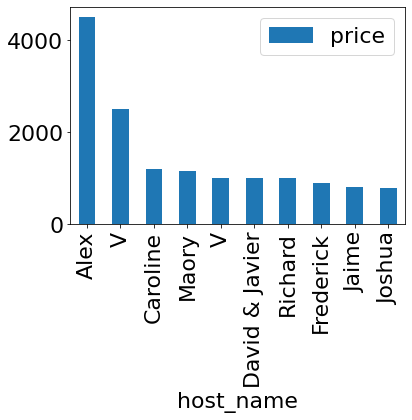

In [23]:
df2 = df1[ df1['room_type']=='Entire home/apt']

df3 = df2[ df2['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df4=df3[df3['neighbourhood']=='Williamsburg']

df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
df5.plot(kind='bar',x='host_name',y='price')

plt.show()

# Same plot with name of property

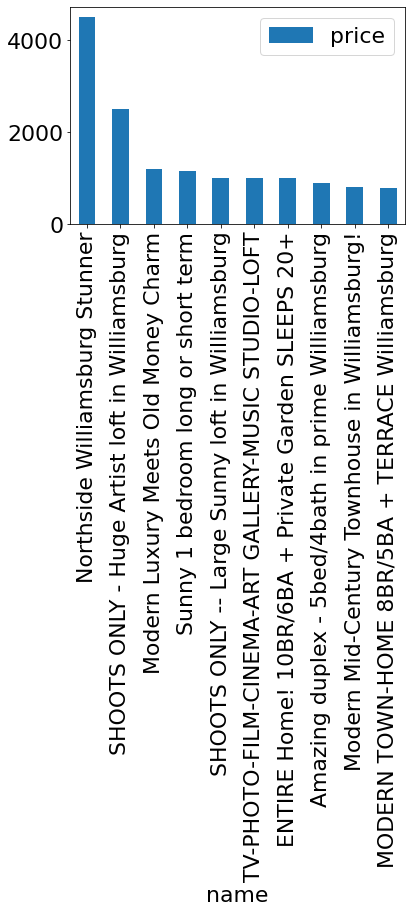

In [24]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Finding cheap host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

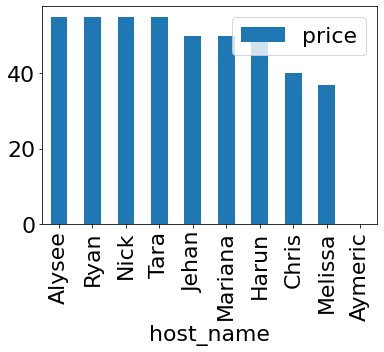

In [25]:
df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
df5.plot(kind='bar',x='host_name',y='price')
plt.show()

# Same plot with name of property

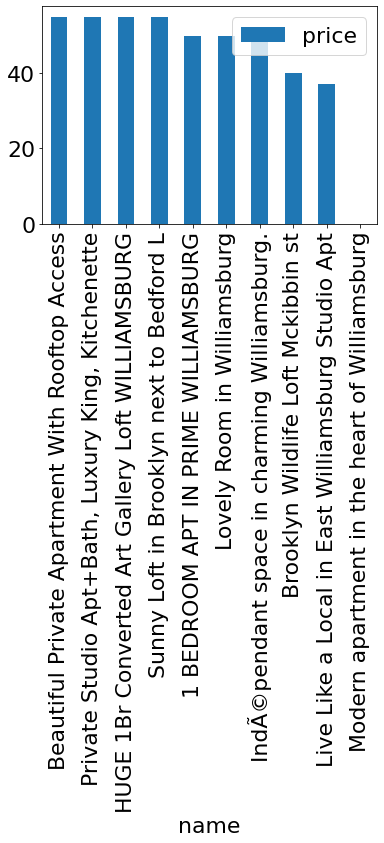

In [26]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Pandas Profiling for automated EDA analysis
# To install Pandas Profiling use following command
# pip install pandas-profiling

In [27]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df1,title='Pandas Profiling Report')
#profile

# Modelling

# 1. DATA CLEANING : Removing unneessary columns (except 'host_id', neighbourhood_group',latitude', 'longitude', 'room_type', 'price')

In [28]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
#df2=df1.drop(['id', 'name', 'host_name', 'neighbourhood_group',
#       'neighbourhood','minimum_nights', 'number_of_reviews', 'last_review',
#       'reviews_per_month', 'calculated_host_listings_count',
#       'availability_365'], axis='columns')
# did not work we can only drop 8 columns at a time

In [30]:
df2=df1.drop(['name', 'host_name',
       'neighbourhood','minimum_nights', 'number_of_reviews'], axis='columns')
df2.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,4271676,Manhattan,40.72217,-73.99481,Private room,120,2015-09-01,0.06,3,0
1,2243769,11460768,Manhattan,40.80020,-73.96045,Entire home/apt,1500,NaN,NaN,1,0
2,35515415,267193767,Queens,40.75558,-73.89316,Entire home/apt,200,2019-07-05,4.00,1,365
3,36202006,43392243,Staten Island,40.60110,-74.07830,Shared room,30,NaN,NaN,4,82
4,3780951,16065171,Manhattan,40.81022,-73.94266,Shared room,115,2019-05-26,0.27,1,365


In [31]:
df3=df2.drop(['last_review','reviews_per_month', 'calculated_host_listings_count','availability_365'], axis='columns')

In [32]:
df3.head()
#df2.columns

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price
0,5728806,4271676,Manhattan,40.72217,-73.99481,Private room,120
1,2243769,11460768,Manhattan,40.80020,-73.96045,Entire home/apt,1500
2,35515415,267193767,Queens,40.75558,-73.89316,Entire home/apt,200
3,36202006,43392243,Staten Island,40.60110,-74.07830,Shared room,30
4,3780951,16065171,Manhattan,40.81022,-73.94266,Shared room,115


In [33]:
df3.isnull().sum() # no null values in df3

id                     0
host_id                0
neighbourhood_group    0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

In [34]:
df3['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# In order to avoid one hot encoding:  I assign numbers
# 1 to 'Private room', 
# 2 to 'Entire home/apt' 
# 3 to 'Shared room'

In [35]:

#i=0
#for roomtype in df2.room_type:
#    if (roomtype=='Entire home/apt'):
#        df2['room_type_i'][i]=2
#    if (roomtype=='Shared room'):
#        df2['room_type_i'][i]=3
#    if (roomtype=='Private room'):
#        df2['room_type_i'][i]=1
#    i = i+1

col = df3.room_type
col.head()

coln =[]

for rmtype in col:
    if(rmtype=='Private room'):
        coln.append(1)
    if(rmtype=='Entire home/apt'):
        coln.append(2)
    if(rmtype=='Shared room'):
        coln.append(3)
        
df3["room_type_new"]=coln
df3.head(10)

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,room_type_new
0,5728806,4271676,Manhattan,40.72217,-73.99481,Private room,120,1
1,2243769,11460768,Manhattan,40.80020,-73.96045,Entire home/apt,1500,2
2,35515415,267193767,Queens,40.75558,-73.89316,Entire home/apt,200,2
3,36202006,43392243,Staten Island,40.60110,-74.07830,Shared room,30,3
4,3780951,16065171,Manhattan,40.81022,-73.94266,Shared room,115,3
5,9944426,51105827,Manhattan,40.71192,-74.01572,Entire home/apt,225,2
6,19786915,86892032,Queens,40.65766,-73.72838,Entire home/apt,60,2
7,22368751,20800727,Brooklyn,40.69064,-73.97898,Entire home/apt,200,2
8,17174519,10590692,Manhattan,40.74443,-74.00012,Entire home/apt,650,2
9,12705519,1372942,Manhattan,40.83170,-73.94290,Entire home/apt,180,2


# dropping the column "room_type"

In [36]:
df4 = df3.drop('room_type',axis='columns')
df4.head()

,id,host_id,neighbourhood_group,latitude,longitude,price,room_type_new
0,5728806,4271676,Manhattan,40.72217,-73.99481,120,1
1,2243769,11460768,Manhattan,40.80020,-73.96045,1500,2
2,35515415,267193767,Queens,40.75558,-73.89316,200,2
3,36202006,43392243,Staten Island,40.60110,-74.07830,30,3
4,3780951,16065171,Manhattan,40.81022,-73.94266,115,3


# 2 REMOVING OUTLIERS

In [37]:
df4.describe()
df4.host_id.value_counts()

219517861    229
107434423    155
30283594      89
16098958      73
61391963      69
            ... 
110042455      1
90334552       1
48331309       1
143031643      1
67641348       1
Name: host_id, Length: 27449, dtype: int64

In [68]:
df5 = df4[df4.price < 250]
df6 = df5[df5.price >= 40]


df6.shape

(28447, 7)

In [71]:
df7 = df6.drop(['neighbourhood_group'],axis='columns')
df7.corr()

,id,host_id,latitude,longitude,price,room_type_new
id,1.000000,0.574986,-0.005100,0.107134,-0.038906,-0.045726
host_id,0.574986,1.000000,0.017633,0.149418,-0.052197,-0.060103
latitude,-0.005100,0.017633,1.000000,0.089350,0.053655,-0.007960
longitude,0.107134,0.149418,0.089350,1.000000,-0.299072,-0.138876
price,-0.038906,-0.052197,0.053655,-0.299072,1.000000,0.544850
room_type_new,-0.045726,-0.060103,-0.007960,-0.138876,0.544850,1.000000


# 3 LINEAR REGRESSION

In [73]:
X=df7.drop('price', axis='columns')
X.shape

(28447, 5)

In [74]:
y = df7.price
y = np.log(y)
y.shape

(28447,)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10)


In [78]:
from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.37244807925360646

# price outliers (price>25 and price<500). sklr.score = 0.2812380 ! very poor
# price outliers (price>50 and price<300). sklr.score = 0.3319087 ! very poor
# price outliers (price>60 and price<250). sklr.score = 0.2721123 ! very poor
#
# THE SCORE MUST BE > .80 the more closer to 1.0 the better it is!!!!

# Will score imporve if host_id also removed?? (NO)

In [44]:
#X1=X.drop('host_id',axis='columns')
#X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2, random_state=10)
#sklr = LinearRegression()
#sklr.fit(X_train,y_train)
#sklr.score(X_test,y_test)

# Guys this model did not work.
# My first model failed !!!!!!!!!!

# K-fold cross validation

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.38060688, 0.38527161, 0.39182625, 0.3759687 , 0.36589679])